In [33]:
## Name: Deepak Gupta
## Roll number: 167507
## Lab : Logistic Regression 

In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as py

e=2.71828

In [35]:
def y_normalize(y):
    hypothesis=1/(1+np.e**(-y))
    hypothesis[hypothesis>=0.5]=1
    hypothesis[hypothesis<0.5]=0
    return hypothesis


In [36]:
def gradientDescent(x,y,alpha,theta,numIter):
    last_cost=1e100 
    cost=[0.0 for i in range(0,numIter)]
    for i in range(0,numIter):
        z=np.dot(x,theta)
        hypothesis=1/(1+e**(-z))
        loss=np.subtract(hypothesis,y) 
        first=np.dot(y.T,np.log(hypothesis))
        second=np.dot((1-y.T),np.log(1-hypothesis))
        cost[i]=0-np.sum(first+second)/m
        j_dash=np.sum(np.dot(x.T,loss)) 
        theta = theta - alpha*j_dash/m
        last_cost = cost[i]
    return (theta,cost)

In [37]:
def prediction(z,x):
    y_pred=1/(1+e**(-z))
    return y_pred

In [38]:
diebetese=load_diabetes()
x=diebetese.data
y=diebetese.target

x=np.append(np.ones((x.shape[0],1)),x,1)

y=(y-y.mean())/np.std(y,axis=0)
y=np.reshape(y,(-1,1))
theta=np.ones((x.shape[1],1))
y=y_normalize(y)

In [39]:
#divide the data set into training and test data
m,n=x.shape
train_start=0
train_end=int(.6*m)

test_start=int(.8*m)
test_end=int(1*m)

x_train=x[train_start:train_end,:]
y_train=y[train_start:train_end,:]

x_test=x[test_start:test_end,:]
y_test=y[test_start:test_end,:]

print( x_train.shape)
print( y_train.shape)

print (x_test.shape)
print (y_test.shape)

(265, 11)
(265, 1)
(89, 11)
(89, 1)


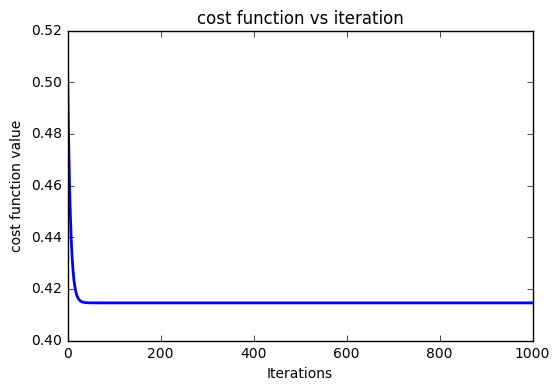

prediction shape
(89, 1)


In [40]:
theta=np.ones((x_train.shape[1],1)) 

alpha=0.55
numIter=1000

cost=[0.0 for i in range(0,numIter)]
iterator=[i for i in range(0,numIter)]

theta,cost=gradientDescent(x_train,y_train,alpha,theta,numIter)
py.plot(iterator,cost,linewidth=2.0)
py.title('cost function vs iteration')
py.xlabel('Iterations')
py.ylabel('cost function value')
py.show()


z=np.dot(x_test,theta)
y_pred=prediction(z,x_test)
print("prediction shape")
print(y_pred.shape)